# **Titanic Dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing, ensemble
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import io
titanic_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [4]:
new_age = np.where(titanic_train['Age'].isnull(),28,titanic_train['Age'])

In [5]:
titanic_train['Age'] = new_age

In [6]:
label_encoder = preprocessing.LabelEncoder()

encoded_sex = label_encoder.fit_transform(titanic_train['Sex'])

In [7]:
features = [titanic_train['Age'],encoded_sex,titanic_train['Fare']]

In [8]:
predictors = pd.DataFrame(features).T

In [9]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit (X=predictors, y=titanic_train['Survived'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
tree_model.score(X=predictors,y=titanic_train['Survived'])

0.9763779527559056

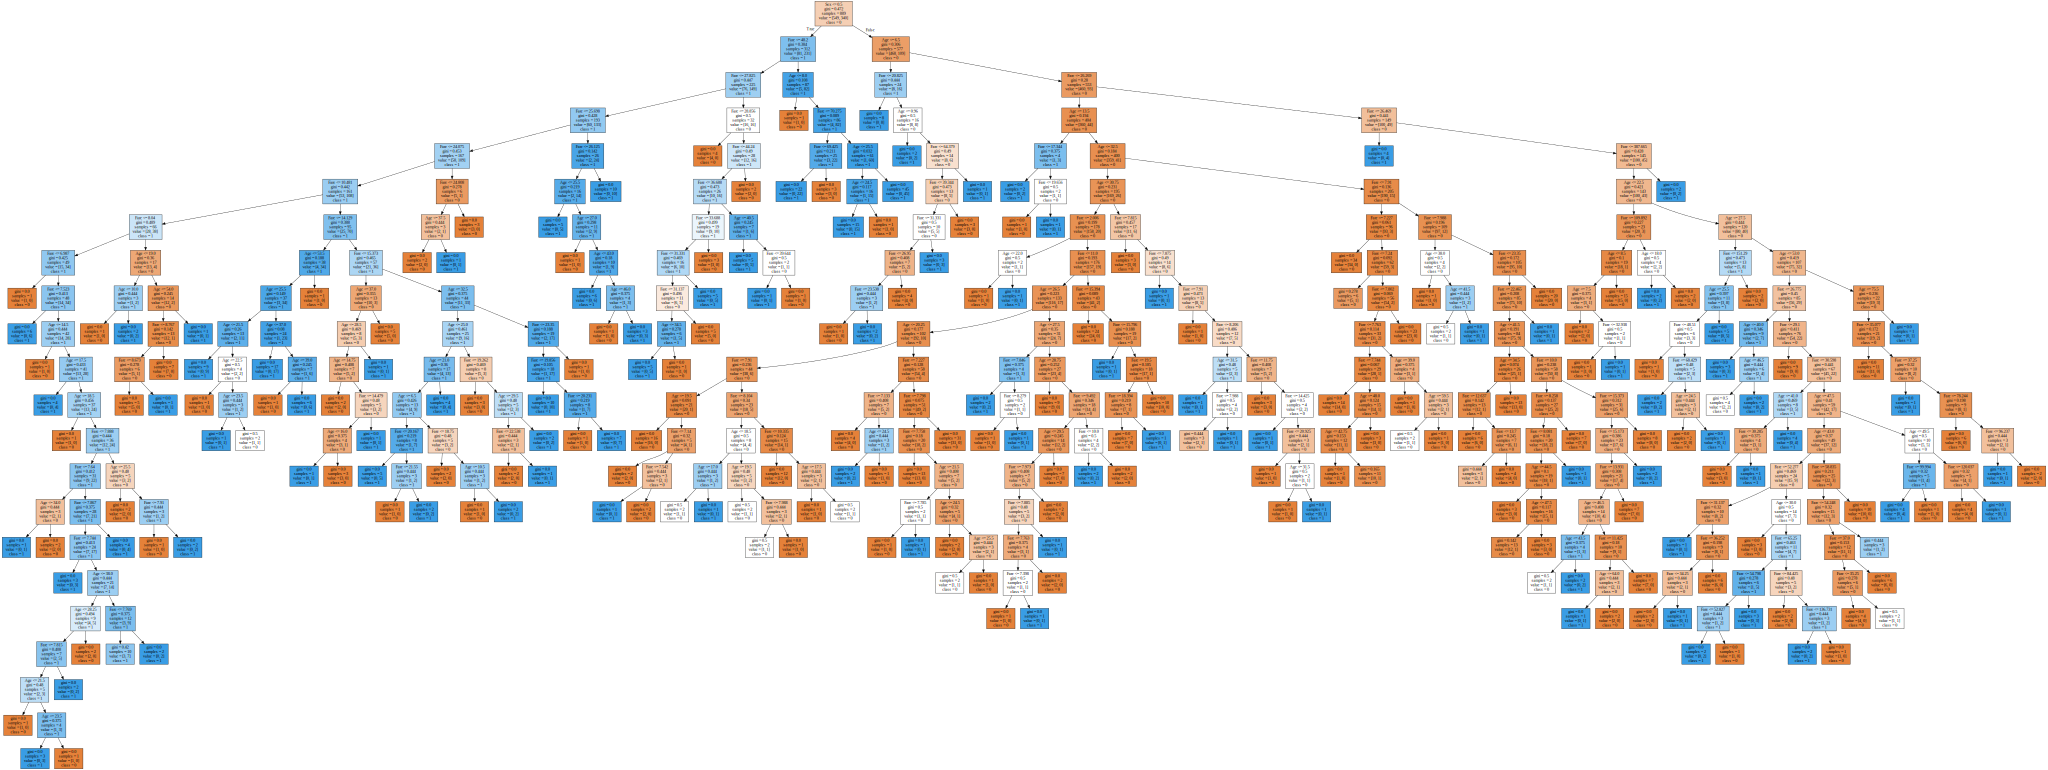

In [11]:
graph = Source(tree.export_graphviz(tree_model, out_file=None
   , feature_names=['Age','Sex','Fare'], class_names=['0', '1'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))